In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random
import sys
from time import sleep
from scipy.signal import convolve2d
import matplotlib.cm as cm
from PIL import Image

In [2]:
img = Image.open('./img.png')

In [3]:
img = img.resize((64, 64), Image.ANTIALIAS)
img = np.asarray(img)

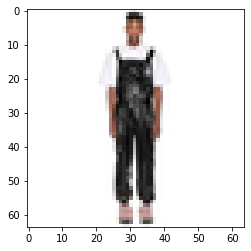

In [4]:
plt.imshow(img)

In [28]:
def random_rectangle(img):
    mask = np.ones(img.shape)
    w, h = img.shape[:2]
    img_area = w * h
    mask_area = 0
    offset = 10
    
    while 0.1 >= mask_area/img_area <= 0.4:
        x1, y1 = random.randrange(offset, int(w*0.6)), random.randrange(offset, int(h*0.6))
        x2, y2 = random.randrange(x1 + 1, w - offset), random.randrange(y1 + 1, h - offset)
        
        mask_area = (x2 - x1) * (y2 - y1)
        
    mask[x1:x2, y1:y2] = 0
    
    return mask

In [6]:
def centered_rectangle(img):
    mask = np.zeros(img.shape)
    h, w = img.shape[:2]
    img_area = w * h
    mask_area = 0
    cx, cy = int(h/2), int(w/2)
    offset = 0
    min_pix = 20
    
    while not (0.1 <= (mask_area/img_area) <= 0.4):
        left = random.randrange(min_pix, int(w/2))
        right = random.randrange(min_pix, int(w/2))
        top = random.randrange(min_pix, int(h/2))
        bottom = random.randrange(min_pix, int(h/2))

        x1, y1 = cx - top, cy - left
        x2, y2 = cx + bottom, cy + right

        mask_area = (x2 - x1) * (y2 - y1)
    
    mask[x1:x2, y1:y2, :] = 1
#     mask[cx, cy] = 1
    
    return mask

In [7]:
def random_noise(image, percent):
    row,col,ch = image.shape
    mask = np.zeros((row, col, 3))
    
    unif = np.random.sample((row, col))
    unif = unif.reshape(row,col)        
    mask[unif > (1 - percent), :] = 1
    
    return mask

In [29]:
def apply_mask(img, mask):
    new_img = np.copy(img)
    new_img[mask == 0] = 1
    
    return new_img

In [43]:
def create_importance_weights(mask, w_size):
    mask_2d = mask[:, :, 0]    
    kernel = np.ones((w_size, w_size), dtype=np.float32)
    kernel = kernel / np.sum(kernel)
    
    importance_weights = mask_2d * convolve2d(1-mask_2d, kernel, mode='same') # , boundary='symm')
#     importance_weights[mask_2d == 1] = 0
    
    return importance_weights

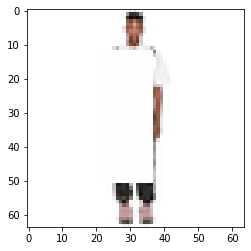

In [40]:
mask = random_rectangle(img)
plt.imshow(mask)
plt.imshow(apply_mask(img, mask))

In [44]:
w = create_importance_weights(mask, 7)

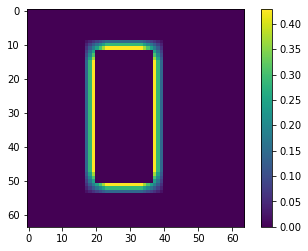

In [45]:
plt.imshow(w)
plt.colorbar()

In [103]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
w

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0. 

In [25]:
from inpaint_model import InpaintModel
import inpaint_model
from imp import reload 
reload(inpaint_model)
# im = InpaintModel(None)

<module 'inpaint_model' from '/Users/darko/Documents/Projects/image-inpainting/src/inpaint_model.py'>

In [56]:
%load_ext autoreload
%autoreload 2

In [62]:
from models.DCGAN_trainer import DCGANTrainer

In [68]:
trainer = DCGANTrainer('../data')

In [69]:
trainer.train()

Starting Training Loop...
[0/100][0/12663]	Loss_D: 1.8602	Loss_G: 8.0618	D(x): 0.7968	D(G(z)): 0.7413 / 0.0005
[0/100][1/12663]	Loss_D: 0.4308	Loss_G: 5.7935	D(x): 0.7928	D(G(z)): 0.1384 / 0.0035
[0/100][2/12663]	Loss_D: 0.5405	Loss_G: 6.2597	D(x): 0.8768	D(G(z)): 0.2700 / 0.0030
[0/100][3/12663]	Loss_D: 0.2743	Loss_G: 6.1907	D(x): 0.9364	D(G(z)): 0.1699 / 0.0023
[0/100][4/12663]	Loss_D: 0.2344	Loss_G: 6.8957	D(x): 0.9852	D(G(z)): 0.1760 / 0.0013
[0/100][5/12663]	Loss_D: 0.2801	Loss_G: 5.7946	D(x): 0.8632	D(G(z)): 0.0951 / 0.0033
[0/100][6/12663]	Loss_D: 0.3566	Loss_G: 7.5868	D(x): 0.9481	D(G(z)): 0.2134 / 0.0007
[0/100][7/12663]	Loss_D: 0.1675	Loss_G: 6.4774	D(x): 0.9069	D(G(z)): 0.0484 / 0.0020


KeyboardInterrupt: 

In [70]:
import time

In [71]:
dt = time.time()
time.sleep(5)
print(time.time() - dt)

5.033397912979126


In [17]:
# import os
from pathlib import Path, PurePath
# Path("/my/directory").mkdir(parents=True, exist_ok=True)
data_path = Path('../data/img_align_celeba')

file_paths = [f for f in data_path.iterdir() if f.is_file()]


In [18]:
file_paths[0]

PosixPath('../data/img_align_celeba/000001.jpg')

In [27]:
test_dir = Path("../data/train")
test_dir.mkdir(parents=True, exist_ok=True)

for i in range(0, len(file_paths), 100):
    file_paths[i].rename(test_dir.joinpath(file_paths[i].name))
    print(f'[+] {test_dir.joinpath(file_paths[i].name)} moved!')

[+] ../data/train/000001.jpg moved!
[+] ../data/train/000101.jpg moved!
[+] ../data/train/000201.jpg moved!
[+] ../data/train/000301.jpg moved!
[+] ../data/train/000401.jpg moved!
[+] ../data/train/000501.jpg moved!
[+] ../data/train/000601.jpg moved!
[+] ../data/train/000701.jpg moved!
[+] ../data/train/000801.jpg moved!
[+] ../data/train/000901.jpg moved!
[+] ../data/train/001001.jpg moved!
[+] ../data/train/001101.jpg moved!
[+] ../data/train/001201.jpg moved!
[+] ../data/train/001301.jpg moved!
[+] ../data/train/001401.jpg moved!
[+] ../data/train/001501.jpg moved!
[+] ../data/train/001601.jpg moved!
[+] ../data/train/001701.jpg moved!
[+] ../data/train/001801.jpg moved!
[+] ../data/train/001901.jpg moved!
[+] ../data/train/002001.jpg moved!
[+] ../data/train/002101.jpg moved!
[+] ../data/train/002201.jpg moved!
[+] ../data/train/002301.jpg moved!
[+] ../data/train/002401.jpg moved!
[+] ../data/train/002501.jpg moved!
[+] ../data/train/002601.jpg moved!
[+] ../data/train/002701.jpg

[+] ../data/train/023701.jpg moved!
[+] ../data/train/023801.jpg moved!
[+] ../data/train/023901.jpg moved!
[+] ../data/train/024001.jpg moved!
[+] ../data/train/024101.jpg moved!
[+] ../data/train/024201.jpg moved!
[+] ../data/train/024301.jpg moved!
[+] ../data/train/024401.jpg moved!
[+] ../data/train/024501.jpg moved!
[+] ../data/train/024601.jpg moved!
[+] ../data/train/024701.jpg moved!
[+] ../data/train/024801.jpg moved!
[+] ../data/train/024901.jpg moved!
[+] ../data/train/025001.jpg moved!
[+] ../data/train/025101.jpg moved!
[+] ../data/train/025201.jpg moved!
[+] ../data/train/025301.jpg moved!
[+] ../data/train/025401.jpg moved!
[+] ../data/train/025501.jpg moved!
[+] ../data/train/025601.jpg moved!
[+] ../data/train/025701.jpg moved!
[+] ../data/train/025801.jpg moved!
[+] ../data/train/025901.jpg moved!
[+] ../data/train/026001.jpg moved!
[+] ../data/train/026101.jpg moved!
[+] ../data/train/026201.jpg moved!
[+] ../data/train/026301.jpg moved!
[+] ../data/train/026401.jpg

[+] ../data/train/062001.jpg moved!
[+] ../data/train/062101.jpg moved!
[+] ../data/train/062201.jpg moved!
[+] ../data/train/062301.jpg moved!
[+] ../data/train/062401.jpg moved!
[+] ../data/train/062501.jpg moved!
[+] ../data/train/062601.jpg moved!
[+] ../data/train/062701.jpg moved!
[+] ../data/train/062801.jpg moved!
[+] ../data/train/062901.jpg moved!
[+] ../data/train/063001.jpg moved!
[+] ../data/train/063101.jpg moved!
[+] ../data/train/063201.jpg moved!
[+] ../data/train/063301.jpg moved!
[+] ../data/train/063401.jpg moved!
[+] ../data/train/063501.jpg moved!
[+] ../data/train/063601.jpg moved!
[+] ../data/train/063701.jpg moved!
[+] ../data/train/063801.jpg moved!
[+] ../data/train/063901.jpg moved!
[+] ../data/train/064001.jpg moved!
[+] ../data/train/064101.jpg moved!
[+] ../data/train/064201.jpg moved!
[+] ../data/train/064301.jpg moved!
[+] ../data/train/064401.jpg moved!
[+] ../data/train/064501.jpg moved!
[+] ../data/train/064601.jpg moved!
[+] ../data/train/064701.jpg

[+] ../data/train/085001.jpg moved!
[+] ../data/train/085101.jpg moved!
[+] ../data/train/085201.jpg moved!
[+] ../data/train/085301.jpg moved!
[+] ../data/train/085401.jpg moved!
[+] ../data/train/085501.jpg moved!
[+] ../data/train/085601.jpg moved!
[+] ../data/train/085701.jpg moved!
[+] ../data/train/085801.jpg moved!
[+] ../data/train/085901.jpg moved!
[+] ../data/train/086001.jpg moved!
[+] ../data/train/086101.jpg moved!
[+] ../data/train/086201.jpg moved!
[+] ../data/train/086301.jpg moved!
[+] ../data/train/086401.jpg moved!
[+] ../data/train/086501.jpg moved!
[+] ../data/train/086601.jpg moved!
[+] ../data/train/086701.jpg moved!
[+] ../data/train/086801.jpg moved!
[+] ../data/train/086901.jpg moved!
[+] ../data/train/087001.jpg moved!
[+] ../data/train/087101.jpg moved!
[+] ../data/train/087201.jpg moved!
[+] ../data/train/087301.jpg moved!
[+] ../data/train/087401.jpg moved!
[+] ../data/train/087501.jpg moved!
[+] ../data/train/087601.jpg moved!
[+] ../data/train/087701.jpg

[+] ../data/train/108801.jpg moved!
[+] ../data/train/108901.jpg moved!
[+] ../data/train/109001.jpg moved!
[+] ../data/train/109101.jpg moved!
[+] ../data/train/109201.jpg moved!
[+] ../data/train/109301.jpg moved!
[+] ../data/train/109401.jpg moved!
[+] ../data/train/109501.jpg moved!
[+] ../data/train/109601.jpg moved!
[+] ../data/train/109701.jpg moved!
[+] ../data/train/109801.jpg moved!
[+] ../data/train/109901.jpg moved!
[+] ../data/train/110001.jpg moved!
[+] ../data/train/110101.jpg moved!
[+] ../data/train/110201.jpg moved!
[+] ../data/train/110301.jpg moved!
[+] ../data/train/110401.jpg moved!
[+] ../data/train/110501.jpg moved!
[+] ../data/train/110601.jpg moved!
[+] ../data/train/110701.jpg moved!
[+] ../data/train/110801.jpg moved!
[+] ../data/train/110901.jpg moved!
[+] ../data/train/111001.jpg moved!
[+] ../data/train/111101.jpg moved!
[+] ../data/train/111201.jpg moved!
[+] ../data/train/111301.jpg moved!
[+] ../data/train/111401.jpg moved!
[+] ../data/train/111501.jpg

[+] ../data/train/138901.jpg moved!
[+] ../data/train/139001.jpg moved!
[+] ../data/train/139101.jpg moved!
[+] ../data/train/139201.jpg moved!
[+] ../data/train/139301.jpg moved!
[+] ../data/train/139401.jpg moved!
[+] ../data/train/139501.jpg moved!
[+] ../data/train/139601.jpg moved!
[+] ../data/train/139701.jpg moved!
[+] ../data/train/139801.jpg moved!
[+] ../data/train/139901.jpg moved!
[+] ../data/train/140001.jpg moved!
[+] ../data/train/140101.jpg moved!
[+] ../data/train/140201.jpg moved!
[+] ../data/train/140301.jpg moved!
[+] ../data/train/140401.jpg moved!
[+] ../data/train/140501.jpg moved!
[+] ../data/train/140601.jpg moved!
[+] ../data/train/140701.jpg moved!
[+] ../data/train/140801.jpg moved!
[+] ../data/train/140901.jpg moved!
[+] ../data/train/141001.jpg moved!
[+] ../data/train/141101.jpg moved!
[+] ../data/train/141201.jpg moved!
[+] ../data/train/141301.jpg moved!
[+] ../data/train/141401.jpg moved!
[+] ../data/train/141501.jpg moved!
[+] ../data/train/141601.jpg

[+] ../data/train/171001.jpg moved!
[+] ../data/train/171101.jpg moved!
[+] ../data/train/171201.jpg moved!
[+] ../data/train/171301.jpg moved!
[+] ../data/train/171401.jpg moved!
[+] ../data/train/171501.jpg moved!
[+] ../data/train/171601.jpg moved!
[+] ../data/train/171701.jpg moved!
[+] ../data/train/171801.jpg moved!
[+] ../data/train/171901.jpg moved!
[+] ../data/train/172001.jpg moved!
[+] ../data/train/172101.jpg moved!
[+] ../data/train/172201.jpg moved!
[+] ../data/train/172301.jpg moved!
[+] ../data/train/172401.jpg moved!
[+] ../data/train/172501.jpg moved!
[+] ../data/train/172601.jpg moved!
[+] ../data/train/172701.jpg moved!
[+] ../data/train/172801.jpg moved!
[+] ../data/train/172901.jpg moved!
[+] ../data/train/173001.jpg moved!
[+] ../data/train/173101.jpg moved!
[+] ../data/train/173201.jpg moved!
[+] ../data/train/173301.jpg moved!
[+] ../data/train/173401.jpg moved!
[+] ../data/train/173501.jpg moved!
[+] ../data/train/173601.jpg moved!
[+] ../data/train/173701.jpg

In [11]:
len(range(0, len(file_paths), 100))

2026

PosixPath('../data/train')